In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/cleaned_house_sales.csv')

### Segment the market based on city, house type, or other criteria to tailor pricing strategies.

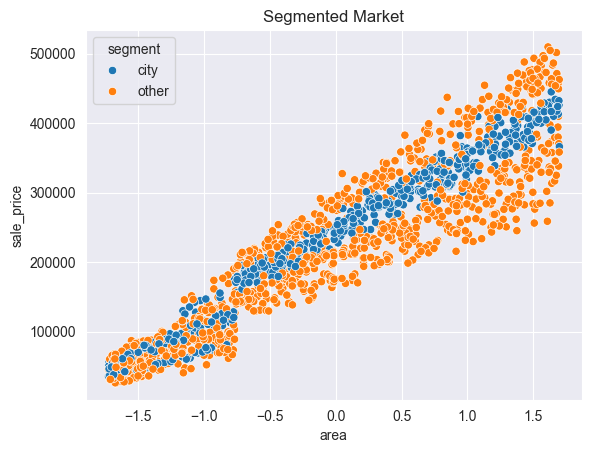

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Custom transformer to handle missing values and scale numerical features
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        scaler = StandardScaler()

        X['area'] = imputer.fit_transform(X[['area']])
        X['months_listed'] = imputer.fit_transform(X[['months_listed']])
        X['bedrooms'] = imputer.fit_transform(X[['bedrooms']])

        X_scaled = scaler.fit_transform(X[['area', 'months_listed', 'bedrooms']])
        X[['area', 'months_listed', 'bedrooms']] = X_scaled

        return X

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['house_type'], drop_first=True)

# Custom preprocessing pipeline
preprocessor = CustomPreprocessor()

# Apply preprocessing and segmentation
df_preprocessed = preprocessor.fit_transform(df_encoded)
df_preprocessed['segment'] = np.where(df_preprocessed['city'] == 'Silvertown', 'city', 'other')

# Visualize the segmented market
sns.scatterplot(x='area', y='sale_price', hue='segment', data=df_preprocessed)
plt.title('Segmented Market')
plt.show()